In [1]:
import pandas as pd
df = pd.read_csv('C:/../AmesHousing.csv')

df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [40]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [19]:
null_columns = df.columns[df.isnull().any()]
df_2 = pd.DataFrame(columns= ['Nombre Variable', 'Cantidad de Nulos'])
for col in null_columns:
    nueva_fila = { 'Nombre Variable': col, 'Cantidad de Nulos': df[col].isnull().sum()}
    df_2 = df_2.append(nueva_fila, ignore_index=True)
df_2

,Nombre Variable,Cantidad de Nulos
0,Lot Frontage,490
1,Alley,2732
2,Mas Vnr Type,23
3,Mas Vnr Area,23
4,Bsmt Qual,80
5,Bsmt Cond,80
6,Bsmt Exposure,83
7,BsmtFin Type 1,80
8,BsmtFin SF 1,1
9,BsmtFin Type 2,81


In [22]:
# Exportar a excel
df_2.to_excel("C:/Empresa/Personal/Docencia/IPP/MACHINE LEARNING CLASIFICACIÓN Y REGRESIÓN/nulos_excel.xlsx", index=False)

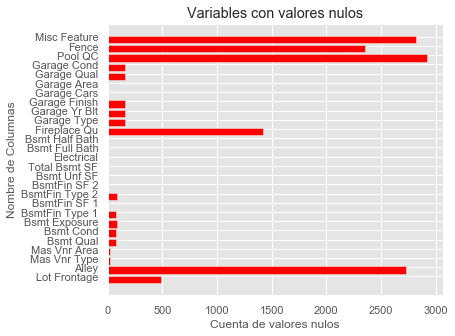

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
import matplotlib
matplotlib.style.use('ggplot')
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
ind
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Cuenta de valores nulos")
ax.set_ylabel("Nombre de Columnas")
ax.set_title("Variables con valores nulos");

In [43]:
obj_df = df.select_dtypes(include=['object'])
print(obj_df.isna().sum())

MS Zoning            0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2917
Fence             2358
Misc Feature      2824
Sale Type            0
Sale Condition       0
dtype: int6

In [41]:
all_columns = list(df.columns)
categorical_data_cols  = [column for column in all_columns if df[column].dtypes == 'O']
continuous_data_cols  = [column for column in all_columns if column not in categorical_data_cols]
print(f"Columnas Data continua: {', '.join(continuous_data_cols)}")
print(f"Columnas Data categórica: {', '.join(categorical_data_cols)}")

Columnas Data continua: Order, PID, MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, Garage Yr Blt, Garage Cars, Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val, Mo Sold, Yr Sold, SalePrice
Columnas Data categórica: MS Zoning, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating, Heating QC, Central Air, Electrical, Kitchen Qual, Functional, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Ga

In [45]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

# Encoding
pre_columns = categorical_data_cols
for c in pre_columns:
    encoder = LabelEncoder()
    df[c] = encoder.fit_transform(df[c].astype("str"))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   int32  
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   int32  
 7   Alley            2930 non-null   int32  
 8   Lot Shape        2930 non-null   int32  
 9   Land Contour     2930 non-null   int32  
 10  Utilities        2930 non-null   int32  
 11  Lot Config       2930 non-null   int32  
 12  Land Slope       2930 non-null   int32  
 13  Neighborhood     2930 non-null   int32  
 14  Condition 1      2930 non-null   int32  
 15  Condition 2      2930 non-null   int32  
 16  Bldg Type        2930 non-null   int32  
 17  House Style   

In [47]:
# Ahora ya numéricos, Imputar datos con el modelo de vecinos cercanos KNN, pero sólo imputamos a las variables que necesitan (variables con nulo menos cabin)
from sklearn.impute import KNNImputer

# Reference columns
x_columns = null_columns
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df[x_columns] = imputer.fit_transform(df[x_columns])

In [ ]:
#Alternativas de imputación
from sklearn.impute import SimpleImputer
model = SimpleImputer(strategy='mean')
df1[' '] = model.fit_transform(df1[' '].values.reshape(-1, 1))
print(df1.isnull().sum())

# Media
df1[' ']=df1[' '].fillna(df1[' '].mean())
print(df1.isnull().sum())

# Moda
model = SimpleImputer(strategy='most_frequent')
df1[''] = model.fit_transform(df1[''].values.reshape(-1, 1))
print(df1.isnull().sum())

In [48]:
null_columns = df.columns[df.isnull().any()]
df_3 = pd.DataFrame(columns= ['Nombre Variable', 'Cantidad de Nulos'])
for col in null_columns:
    nueva_fila = { 'Nombre Variable': col, 'Cantidad de Nulos': df[col].isnull().sum()}
    df_3 = df_3.append(nueva_fila, ignore_index=True)
df_3

,Nombre Variable,Cantidad de Nulos


In [65]:
seed_number = 28
label_column = 'SalePrice'
df_4 = df.drop("SalePrice", axis='columns')
train_columns = df_4.columns
X, y = df[train_columns], df[label_column]

In [72]:
# Realizamos la división del set de entrenamiento en entrenamiento (77% del set de datos) y validación (33% del set de datos)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=seed_number)

In [73]:
# Se escalan los valores (z = (x - media) / desviación estándar)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled[1]

array([-1.11767202, -0.96852911, -0.86550146,  0.05323114,  0.75219078,
        0.1494091 ,  0.07155647,  0.25387233,  0.75171841,  0.32593792,
       -0.03764403, -1.92629431, -0.23158466,  1.33310291,  2.15996184,
       10.44843455, -0.42131441, -0.51157323,  2.07186914, -0.49979909,
        1.12112089,  1.04367773,  1.9697464 , -0.12040025,  0.77101326,
        0.77631294,  1.44903225,  0.58485038, -3.68430294,  0.38335101,
        0.83808785, -2.09025587,  0.22883199, -1.14865432, -0.45639836,
        3.8173408 ,  0.28858165, -0.30184799, -0.59280453,  3.29845087,
       -0.10029327, -0.88472589,  0.26631182,  0.29594462,  3.46449921,
       -0.76585856, -0.0946317 ,  2.00620214,  1.08063871, -0.25002066,
        0.80642612, -0.75053892, -1.02298589, -0.20568123, -2.26341543,
        1.63380572,  0.26811052,  2.11830613, -1.30989682, -0.76808769,
        1.1150637 , -1.44578004,  1.60994647,  1.48844031,  0.15052383,
        0.08350358,  0.32539607, -0.18321077,  2.64665208, -0.35

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model = RandomForestRegressor()

params = {"n_estimators": [100],
          "max_features": [2,3,4],
          "max_depth": [5,8,10,15]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5, return_train_score = True, scoring= 'neg_mean_squared_error')
grid.fit(X_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

-837610285.8262513
{'max_depth': 15, 'max_features': 4, 'n_estimators': 100}


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,15,4,100,-8.376103e+08,1.195912e+08,-1.321026e+08,6.258226e+06


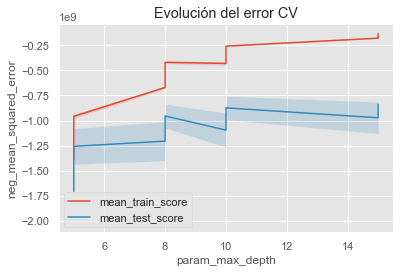

In [100]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_max_depth'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [101]:
modelf = RandomForestRegressor(**grid.best_params_)
modelf.fit(X_scaled, y_train)
Yhatt = modelf.predict(X_scaled)

mse = mean_squared_error(y_train, Yhatt)
mae = mean_absolute_error(y_train, Yhatt)
R2 = r2_score(y_train, Yhatt)

print("MSE train: ",mse)
print("MAE train: ",mae)
print("R^2 train: ",R2)

Yhat = modelf.predict(X_val)
mse2 = mean_squared_error(y_val, Yhat)
mae2 = mean_absolute_error(y_val, Yhat)
R2_2 = r2_score(y_val, Yhat)

print("MSE test: ",mse2)
print("MAE test: ",mae2)
print("R^2 test: ",R2_2)

MSE train:  131382749.81369014
MAE train:  7187.378855405291
R^2 train:  0.9796753710604225
MSE test:  24137262986.61898
MAE test:  145570.66363805585
R^2 test:  -2.8886081374671124
